# AT & T Stock Price Prediction

## Reading data

In [51]:
import pandas as pd
import numpy as np
from datetime import datetime, timezone
data=pd.read_csv("AT_T_SBC_Stock_Price_Data_2000_2020.csv")

## Data Analysis

In [52]:
data.head()

,a_permno,PERMNO,DATE,CUSIP,NCUSIP,COMNAM,TICKER,PERMCO,SHRCD,SHRCLS,...,NAICS,PRIMEXCH,TRDSTAT,SECSTAT,PRC,VOL,OPENPRC,ASKHI,BIDLO,BID
0,66093,66093,20000103,00206R10,78387G10,S B C COMMUNICATIONS INC,SBC,21645,11,NaN,...,NaN,N,A,R,47.1875,5791500,48.5625,49.00,46.5000,47.000
1,66093,66093,20000104,00206R10,78387G10,S B C COMMUNICATIONS INC,SBC,21645,11,NaN,...,NaN,N,A,R,44.2500,7173500,47.0625,47.75,43.5000,44.250
2,66093,66093,20000105,00206R10,78387G10,S B C COMMUNICATIONS INC,SBC,21645,11,NaN,...,NaN,N,A,R,44.9375,9090000,45.0000,45.25,44.4375,44.125
3,66093,66093,20000106,00206R10,78387G10,S B C COMMUNICATIONS INC,SBC,21645,11,NaN,...,NaN,N,A,R,43.7500,7154299,44.5625,45.00,43.1250,43.500
4,66093,66093,20000107,00206R10,78387G10,S B C COMMUNICATIONS INC,SBC,21645,11,NaN,...,NaN,N,A,R,44.1250,5883699,44.5625,44.75,43.3750,43.750


In [53]:
data.tail()

,a_permno,PERMNO,DATE,CUSIP,NCUSIP,COMNAM,TICKER,PERMCO,SHRCD,SHRCLS,...,NAICS,PRIMEXCH,TRDSTAT,SECSTAT,PRC,VOL,OPENPRC,ASKHI,BIDLO,BID
5282,66093,66093,20201224,00206R10,00206R10,A T & T INC,T,21645,11,NaN,...,517911.0,N,A,R,28.69,19153092,28.73,28.7600,28.50,28.70
5283,66093,66093,20201228,00206R10,00206R10,A T & T INC,T,21645,11,NaN,...,517911.0,N,A,R,28.55,41619463,28.93,28.9591,28.50,28.54
5284,66093,66093,20201229,00206R10,00206R10,A T & T INC,T,21645,11,NaN,...,517911.0,N,A,R,28.54,36617545,28.69,28.8800,28.51,28.54
5285,66093,66093,20201230,00206R10,00206R10,A T & T INC,T,21645,11,NaN,...,517911.0,N,A,R,28.49,34347761,28.54,28.6800,28.43,28.48
5286,66093,66093,20201231,00206R10,00206R10,A T & T INC,T,21645,11,NaN,...,517911.0,N,A,R,28.76,38622254,28.45,28.8000,28.39,28.75


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5287 entries, 0 to 5286
Data columns (total 29 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   a_permno  5287 non-null   int64  
 1   PERMNO    5287 non-null   int64  
 2   DATE      5287 non-null   int64  
 3   CUSIP     5287 non-null   object 
 4   NCUSIP    5287 non-null   object 
 5   COMNAM    5287 non-null   object 
 6   TICKER    5287 non-null   object 
 7   PERMCO    5287 non-null   int64  
 8   SHRCD     5287 non-null   int64  
 9   SHRCLS    0 non-null      float64
 10  ISSUNO    5287 non-null   int64  
 11  EXCHCD    5287 non-null   int64  
 12  HEXCD     5287 non-null   int64  
 13  SICCD     5287 non-null   int64  
 14  HSICCD    5287 non-null   int64  
 15  HSICMG    4787 non-null   float64
 16  HSICIG    4787 non-null   float64
 17  NAMEENDT  7 non-null      float64
 18  TSYMBOL   4787 non-null   object 
 19  NAICS     4170 non-null   float64
 20  PRIMEXCH  5287 non-null   obje

In [55]:
from datetime import datetime, timezone
import pytz

data["DATE"] =  list(map(lambda x: datetime.strptime(str(x), '%Y%m%d'), data["DATE"] ))

In [56]:
data.head()

,a_permno,PERMNO,DATE,CUSIP,NCUSIP,COMNAM,TICKER,PERMCO,SHRCD,SHRCLS,...,NAICS,PRIMEXCH,TRDSTAT,SECSTAT,PRC,VOL,OPENPRC,ASKHI,BIDLO,BID
0,66093,66093,2000-01-03,00206R10,78387G10,S B C COMMUNICATIONS INC,SBC,21645,11,NaN,...,NaN,N,A,R,47.1875,5791500,48.5625,49.00,46.5000,47.000
1,66093,66093,2000-01-04,00206R10,78387G10,S B C COMMUNICATIONS INC,SBC,21645,11,NaN,...,NaN,N,A,R,44.2500,7173500,47.0625,47.75,43.5000,44.250
2,66093,66093,2000-01-05,00206R10,78387G10,S B C COMMUNICATIONS INC,SBC,21645,11,NaN,...,NaN,N,A,R,44.9375,9090000,45.0000,45.25,44.4375,44.125
3,66093,66093,2000-01-06,00206R10,78387G10,S B C COMMUNICATIONS INC,SBC,21645,11,NaN,...,NaN,N,A,R,43.7500,7154299,44.5625,45.00,43.1250,43.500
4,66093,66093,2000-01-07,00206R10,78387G10,S B C COMMUNICATIONS INC,SBC,21645,11,NaN,...,NaN,N,A,R,44.1250,5883699,44.5625,44.75,43.3750,43.750


In [57]:
data["TICKER"].unique() # Check for unique tickers

array(['SBC', 'T'], dtype=object)

In [58]:
data_sbc=data[data["TICKER"]=="SBC"]
data_t=data[data["TICKER"]=="T"]

In [59]:
# Check Price values in the dataset
a= data_sbc["PRC"]
b= data_sbc["DATE"]
c= data_t["PRC"]
d= data_t["DATE"]

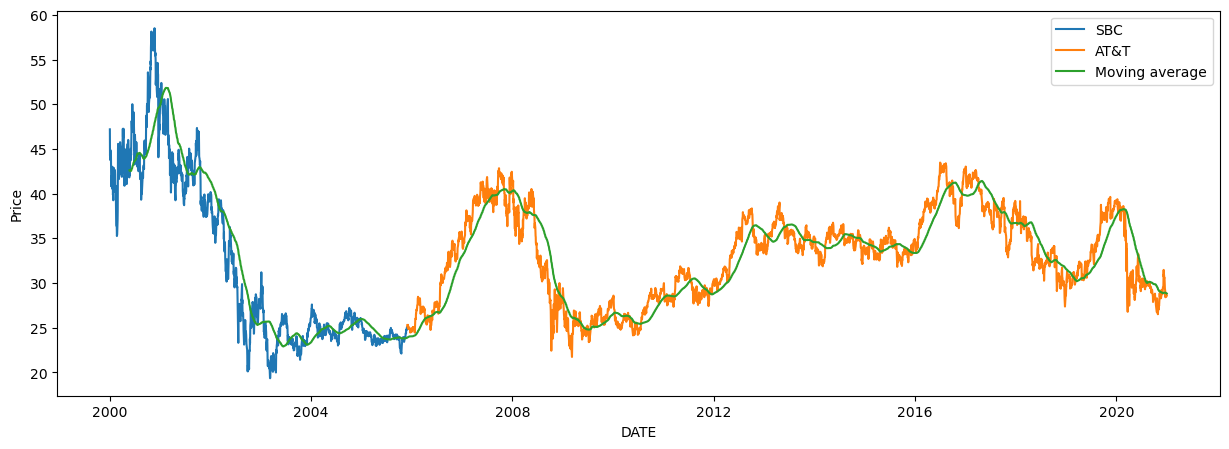

In [60]:
import matplotlib.pyplot as plt
fig=plt.subplots(figsize=(15,5))
plt.plot(b,a,label="SBC")
plt.plot(d,c,label="AT&T")
plt.plot(data['DATE'],data["PRC"].rolling(100).mean(),label="Moving average")
plt.xlabel("DATE")
plt.ylabel("Price")
plt.legend()
plt.show()


In [61]:
# Check volume over time 
vols=data['VOL']
d=data['DATE']

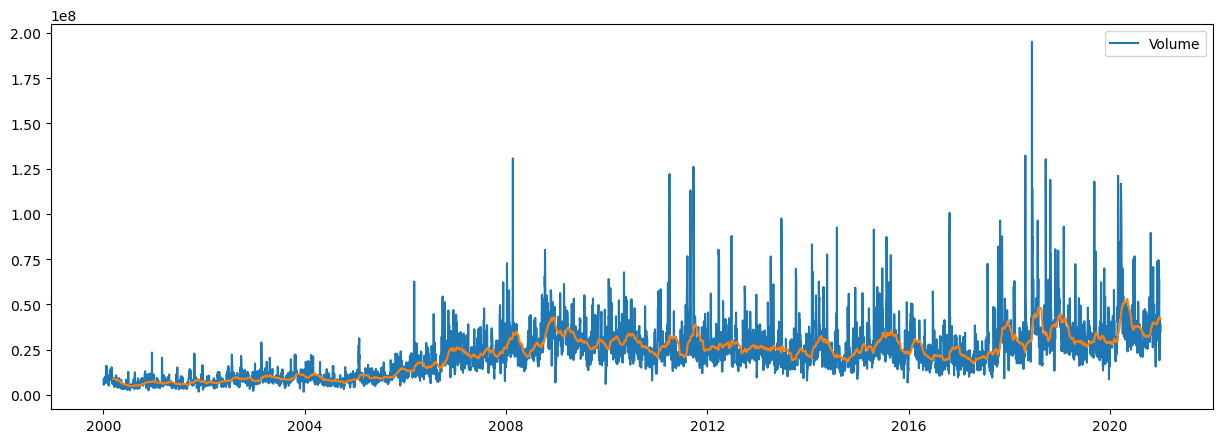

In [62]:
fig=plt.subplots(figsize=(15,5))
plt.plot(d,vols,label="Volume")
plt.plot(d,vols.rolling(50).mean())
plt.legend()
plt.show()

## Prepare Data For Prediction

In [63]:
# take price field from data for prediction
df=data["PRC"]
df=pd.DataFrame(df)

#df=df.reshape(-1,1)

In [64]:
# Create training and test dataset
df_train = np.array(df[:int(df.shape[0]*0.7)])
df_test = np.array(df[int(df.shape[0]*0.7):])
df_train_date = np.array(d[:int(d.shape[0]*0.7)])
df_test_dates = np.array(d[int(d.shape[0]*0.7):])

In [65]:
# Scale prices
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_train = scaler.fit_transform(df_train)
df_test = scaler.transform(df_test)


In [66]:
df_train

array([[0.71112104],
       [0.63610827],
       [0.65366445],
       ...,
       [0.39223698],
       [0.39606742],
       [0.38712972]])

In [67]:
# create dataframe by grouping 100 days prices as input and day prices as output.
def data(df):
    ip = []
    op = []
    for i in range(100, df.shape[0]):
        ip.append(df[i-100:i, 0])
        op.append(df[i, 0])
    ip = np.array(ip)
    op = np.array(op)
    return ip,op

In [68]:
x_train, y_train = data(df_train)
x_test, y_test = data(df_test)


In [69]:
x_train.shape

(3600, 100)

## Linear Regression

In [70]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)

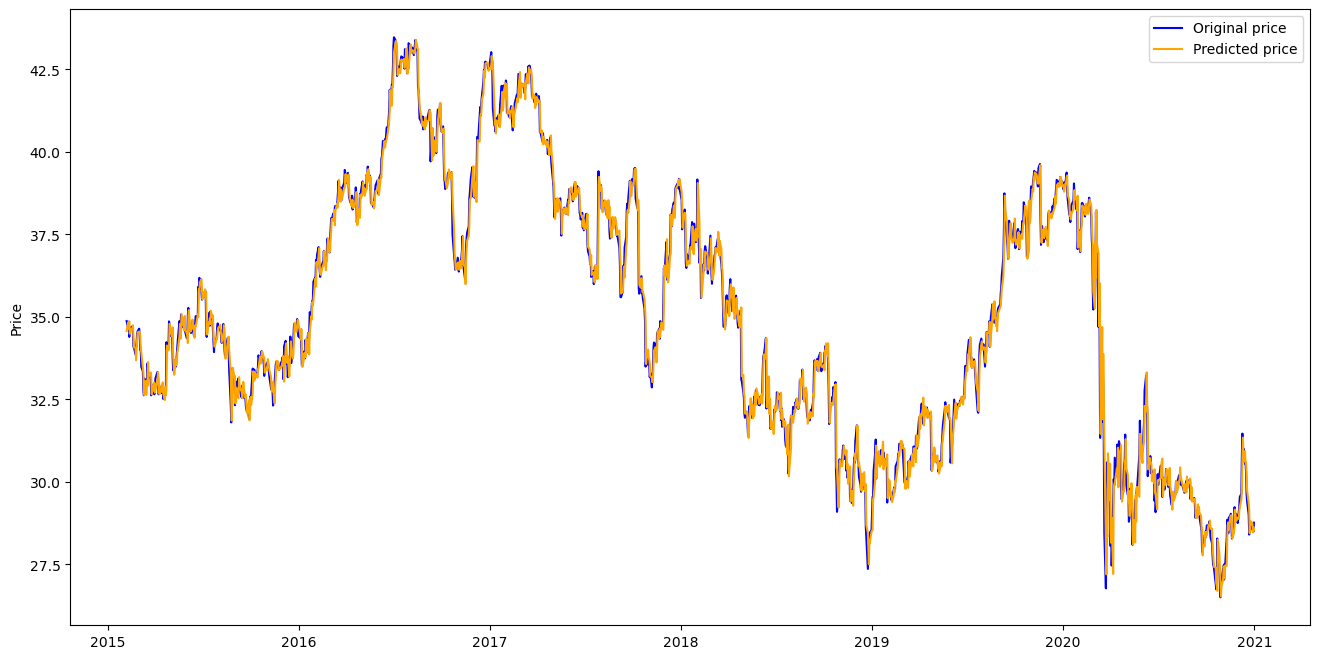

In [71]:

pred = model.predict(x_test)
pred=pred.reshape(-1,1)
pred = scaler.inverse_transform(pred)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))

ax.plot(df_test_dates[100:],y_test_scaled, color='blue', label='Original price')
plt.plot(df_test_dates[100:],pred, color='orange', label='Predicted price')
plt.ylabel("Price")
plt.legend()
plt.show()

In [80]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print(mean_squared_error(y_test_scaled, pred))
print(r2_score(y_test_scaled, pred))
print( mean_absolute_error(y_test_scaled, pred) )

0.2323030963027029
0.9852477595512142
0.32907624202749386


In [72]:
## Regularize using Lasso and Ridge

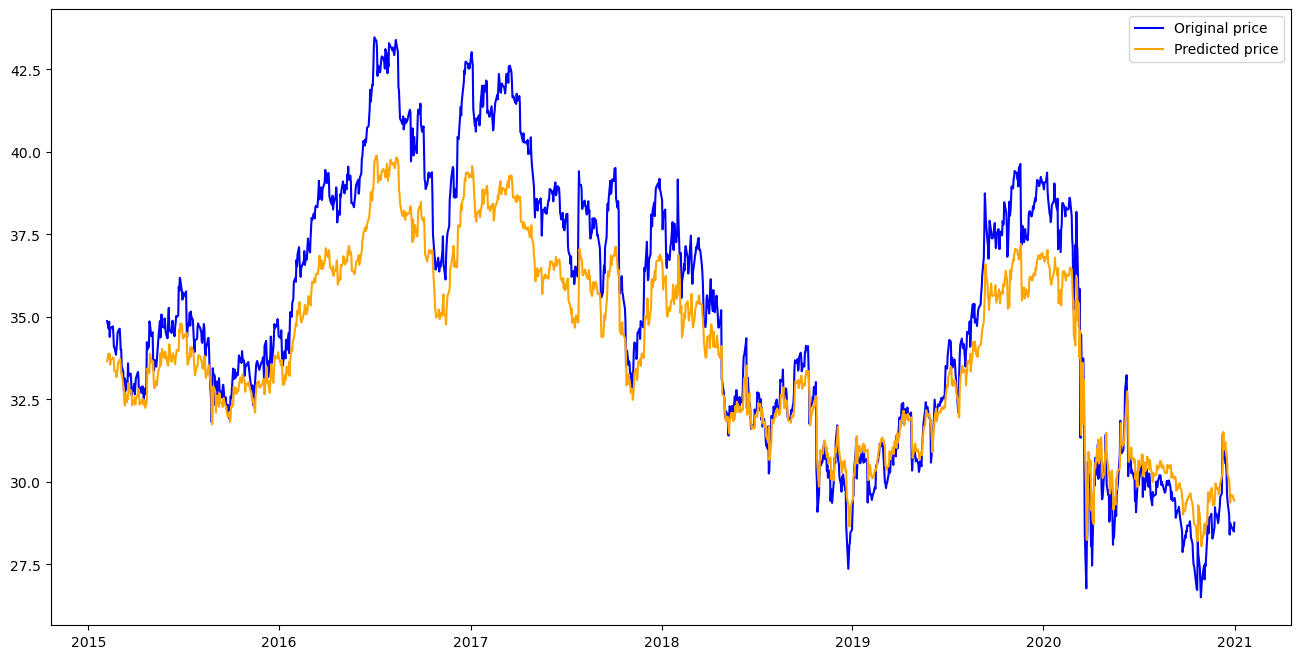

In [73]:
from sklearn.linear_model import Lasso
model=Lasso(alpha=0.01)
model.fit(x_train, y_train)
pred = model.predict(x_test)
pred=pred.reshape(-1,1)
pred = scaler.inverse_transform(pred)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))

ax.plot(df_test_dates[100:],y_test_scaled, color='blue', label='Original price')
plt.plot(df_test_dates[100:],pred, color='orange', label='Predicted price')
plt.legend()

In [74]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print(mean_squared_error(y_test_scaled, pred))
print(r2_score(y_test_scaled, pred))
print( mean_absolute_error(y_test_scaled, pred) )

2.6569381124846227
0.8312730630079854
1.3190946863669162


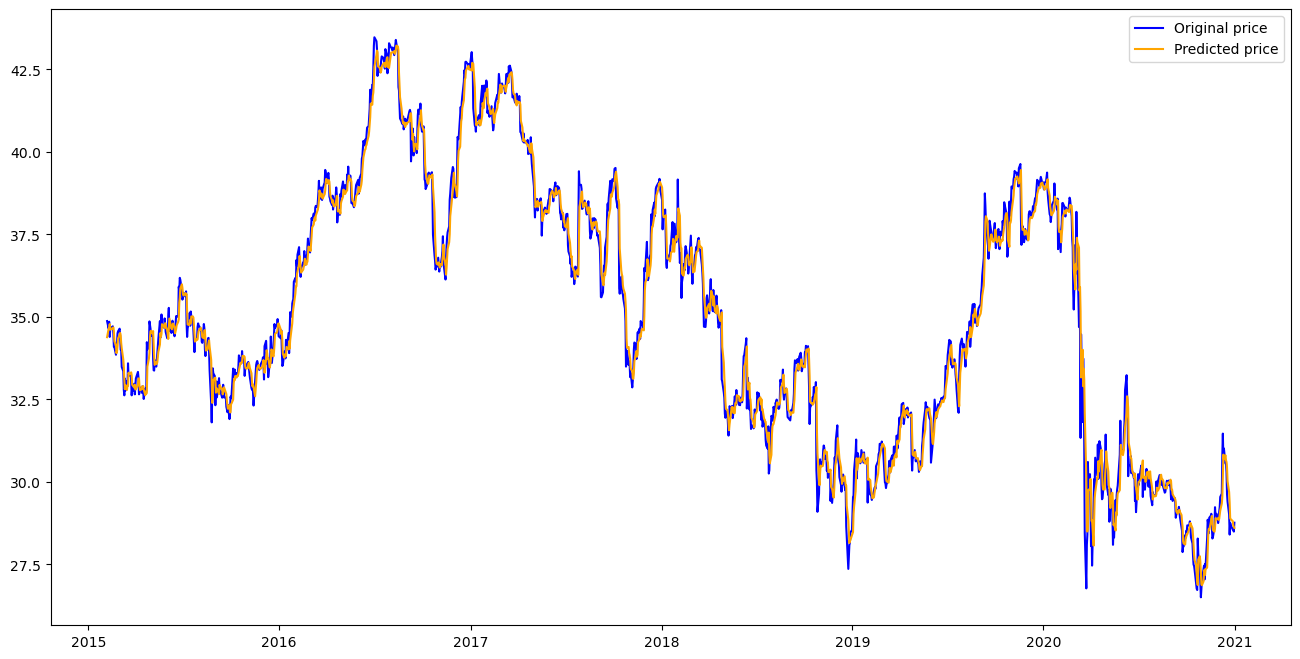

In [75]:
from sklearn.linear_model import Ridge
model=Ridge(alpha=1)
model.fit(x_train, y_train)
pred = model.predict(x_test)
pred=pred.reshape(-1,1)
pred = scaler.inverse_transform(pred)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))

ax.plot(df_test_dates[100:],y_test_scaled, color='blue', label='Original price')
plt.plot(df_test_dates[100:],pred, color='orange', label='Predicted price')
plt.legend()

In [76]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print(mean_squared_error(y_test_scaled, pred))
print(r2_score(y_test_scaled, pred))
print( mean_absolute_error(y_test_scaled, pred) )

0.2723283420778365
0.9827059852094417
0.3616201328766901


In [77]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

## Predict using LSTM (Long Short Term Memory)

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

In [100]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))

model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
#model.add(Dropout(0.2))
#model.add(LSTM(units=96,return_sequences=True))
#model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [102]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=10,batch_size=32)
model.save('stock_prediction.h5')

Epoch 1/10
113/113 [==============================] - 45s 308ms/step - loss: 0.0083
Epoch 2/10
113/113 [==============================] - 36s 319ms/step - loss: 0.0029
Epoch 3/10
113/113 [==============================] - 36s 317ms/step - loss: 0.0024
Epoch 4/10
113/113 [==============================] - 36s 318ms/step - loss: 0.0021
Epoch 5/10
113/113 [==============================] - 36s 317ms/step - loss: 0.0018
Epoch 6/10
113/113 [==============================] - 36s 317ms/step - loss: 0.0017
Epoch 7/10
113/113 [==============================] - 36s 317ms/step - loss: 0.0015
Epoch 8/10
113/113 [==============================] - 36s 316ms/step - loss: 0.0015
Epoch 9/10
113/113 [==============================] - 36s 315ms/step - loss: 0.0016
Epoch 10/10
113/113 [==============================] - 36s 315ms/step - loss: 0.0015


47/47 [==============================] - 7s 104ms/step


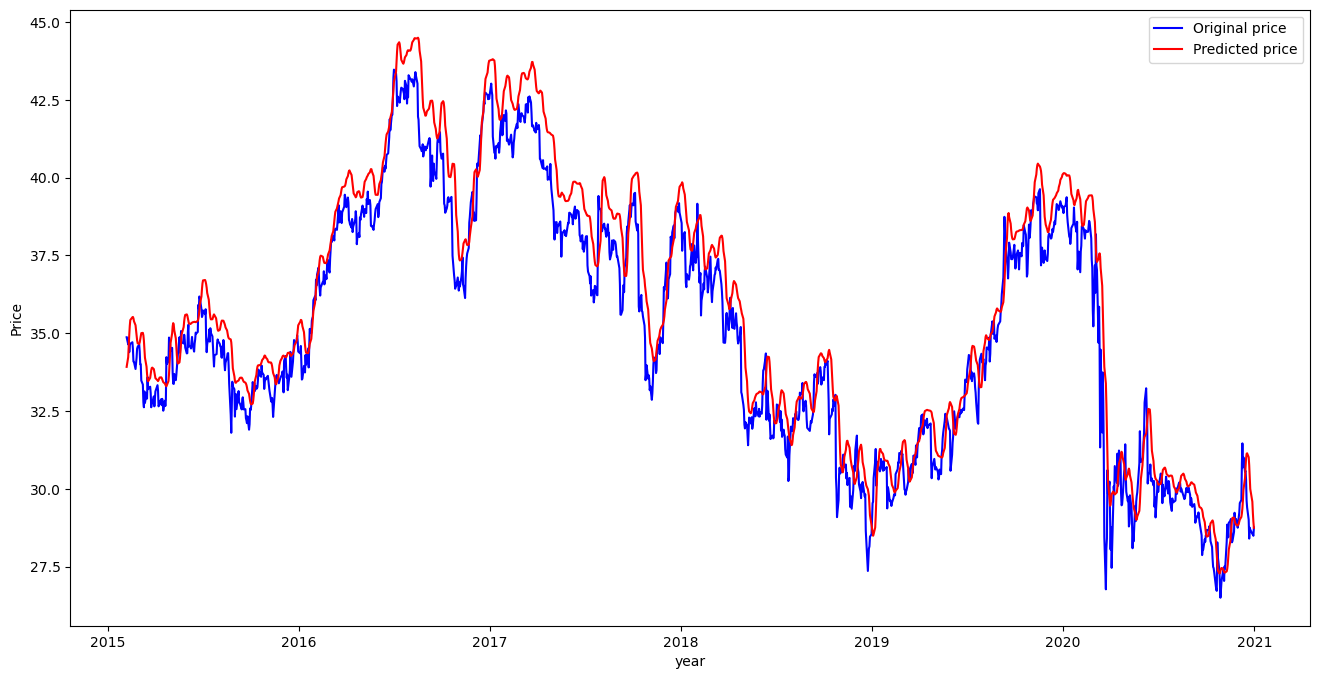

In [103]:
pred = model.predict(x_test)
pred = scaler.inverse_transform(pred)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))

ax.plot(df_test_dates[100:],y_test_scaled, color='blue', label='Original price')
plt.plot(df_test_dates[100:],pred, color='red', label='Predicted price')
plt.xlabel("year")
plt.ylabel("Price")
plt.legend()

In [104]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print(mean_squared_error(y_test_scaled, pred))
print(r2_score(y_test_scaled, pred))
print( mean_absolute_error(y_test_scaled, pred) )

1.4204435730107492
0.9097957562060137
0.9382485691524626
